# Uber Data Analysis




In this project, we study the data of Uber which is present in tabular format in which we use different libraries like numpy, pandas and matplotlib and different machine learning algorithms.

We study different columns of the table and try to co-relate them with others and find a relation between those two.



In [1]:
!pip install kaggle


In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d zusmani/uberdrives


  0% 0.00/16.9k [00:00<?, ?B/s]
100% 16.9k/16.9k [00:00<00:00, 21.4MB/s]


In [5]:
!unzip uberdrives.zip

Archive:  uberdrives.zip
  inflating: My Uber Drives - 2016.csv  


## 2. Collecting the data
___________________________________

In [6]:
import pandas as pd

uber = pd.read_csv(r"/content/My Uber Drives - 2016.csv")

## 3. Exploratory data analysis
__________________________________________________

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it.

EDA is all about making sense of data in hand.


In [7]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
uber.shape

(1156, 7)

In [14]:
uber.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [15]:
# Overview of the dataset
print("\nOverview of the Dataset:")
print(uber.info())

# General Statistics
print("\nGeneral Statistics:")
print(uber.describe())


Overview of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None

General Statistics:
             MILES*
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000



Purpose Analysis:
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64


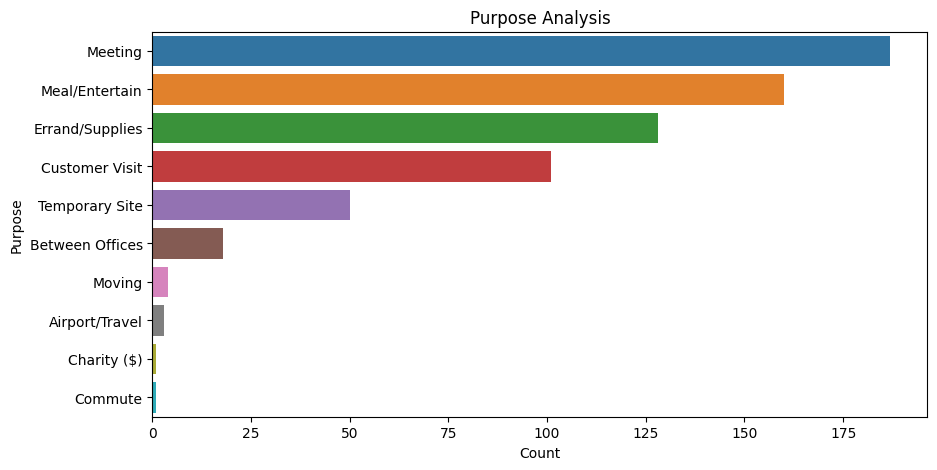

In [16]:
# Purpose Analysis
print("\nPurpose Analysis:")
print(uber['PURPOSE*'].value_counts())





# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Purpose Analysis
plt.figure(figsize=(10, 5))
sns.countplot(y='PURPOSE*', data=uber, order=uber['PURPOSE*'].value_counts().index)
plt.title('Purpose Analysis')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()




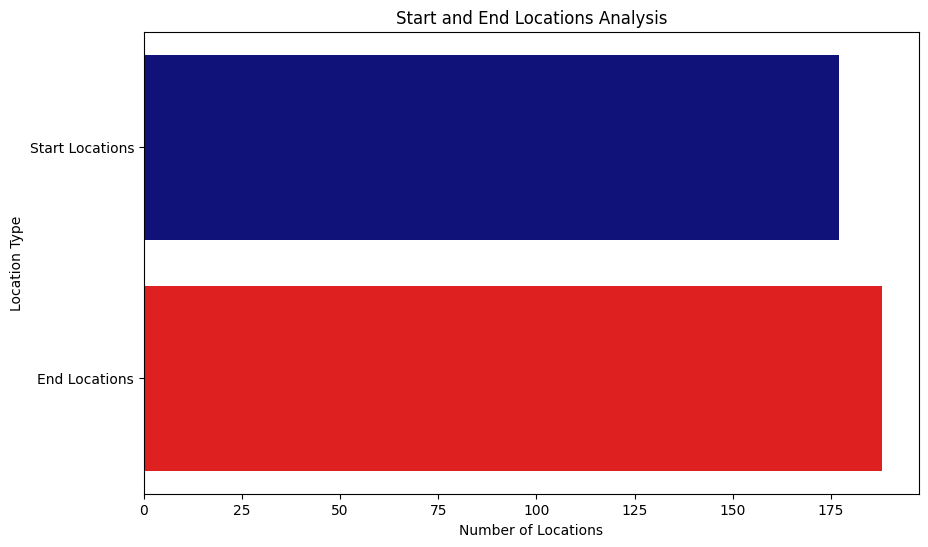

In [24]:
# Location Analysis - Horizontal Bar Plot
# Calculate the number of unique start locations
start_locations = uber['START*'].nunique()

# Calculate the number of unique end locations
end_locations = uber['STOP*'].nunique()

# Location Analysis - Horizontal Bar Plot
locations_data = {'Location Type': ['Start Locations', 'End Locations'],
                  'Number of Locations': [start_locations, end_locations],
                  'Color': ['darkblue', 'red']}

locations_df = pd.DataFrame(locations_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Locations', y='Location Type', data=locations_df, palette=locations_df['Color'])
plt.title('Start and End Locations Analysis')
plt.xlabel('Number of Locations')
plt.ylabel('Location Type')
plt.show()


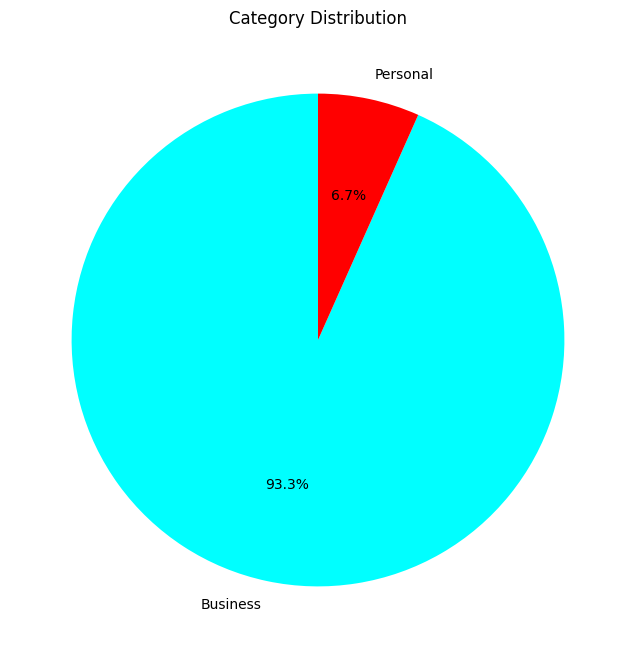

In [22]:
# Pie chart for Category Analysis
plt.figure(figsize=(8, 8))
uber['CATEGORY*'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['aqua', 'red'])
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

In [19]:
# Drop the 'Totals' row
uber = uber[uber['START_DATE*'] != 'Totals']

# Convert 'START_DATE*' and 'END_DATE*' to datetime objects
uber['START_DATE*'] = pd.to_datetime(uber['START_DATE*'])
uber['END_DATE*'] = pd.to_datetime(uber['END_DATE*'])

# Extract month and hour from 'START_DATE*'
uber['Month'] = uber['START_DATE*'].dt.month
uber['Hour'] = uber['START_DATE*'].dt.hour

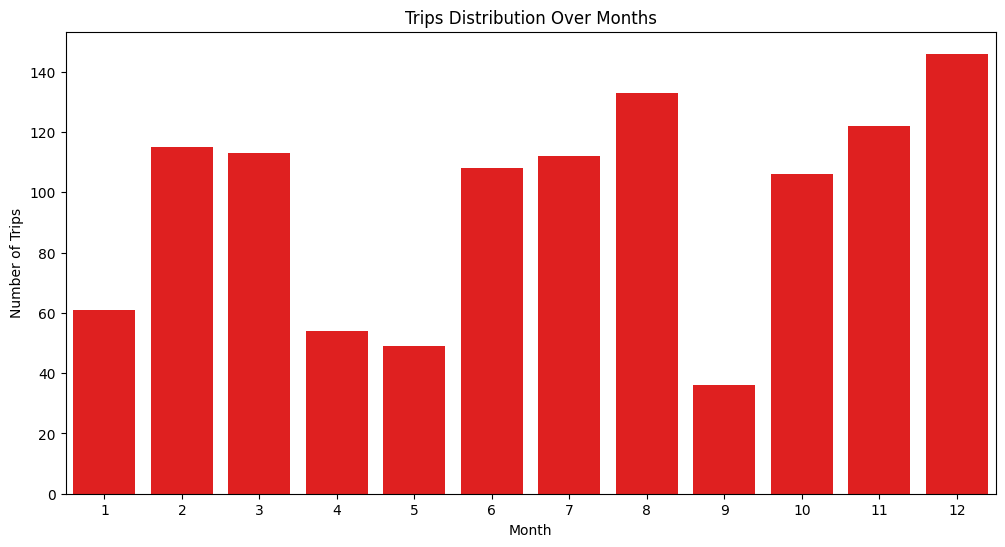

In [20]:
# Monthly Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=uber, color ='red')
plt.title('Trips Distribution Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()



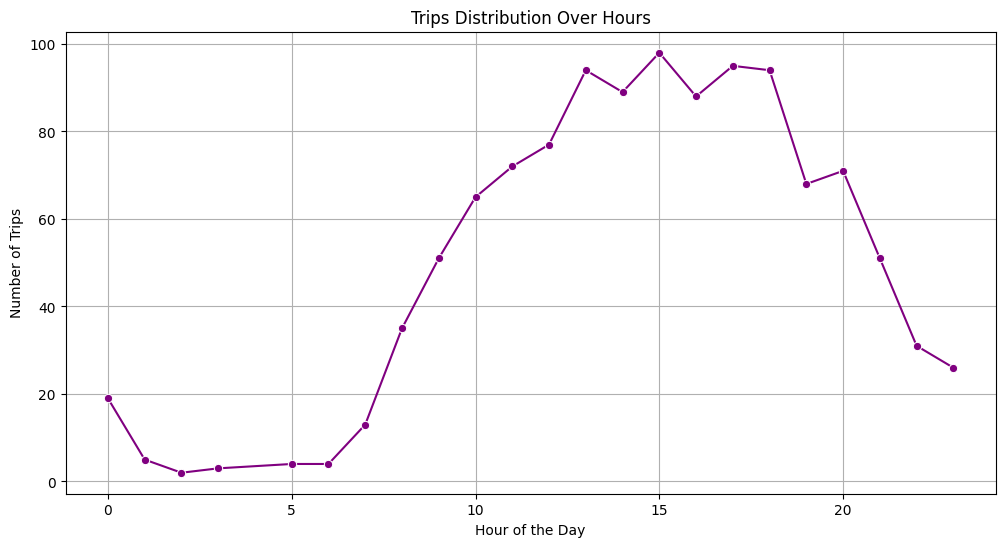

In [21]:
# Hourly Analysis - Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Count', data=uber.groupby('Hour').size().reset_index(name='Count'), marker='o', color='purple')
plt.title('Trips Distribution Over Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


In [12]:
# Fill missing values for numerical columns with the mean
uber['MILES*'].fillna(uber['MILES*'].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
uber['END_DATE*'].fillna(uber['END_DATE*'].mode()[0], inplace=True)
uber['CATEGORY*'].fillna(uber['CATEGORY*'].mode()[0], inplace=True)
uber['START*'].fillna(uber['START*'].mode()[0], inplace=True)
uber['STOP*'].fillna(uber['STOP*'].mode()[0], inplace=True)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you want to classify based on the 'MILES*' column
# You may need to replace this variable with your actual data
uber['Number of Trips'] = pd.cut(uber['MILES*'], bins=[0, 10, 20, float('inf')], labels=['Low', 'Medium', 'High'])

# Select features and target variable
X = uber[['START*', 'STOP*', 'PURPOSE*']]
y = uber['Number of Trips']

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['START*', 'STOP*', 'PURPOSE*'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize the Random Forest Classifier model with the best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)

# Train the model
rf_classifier_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_classifier_best = rf_classifier_best.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred_rf_classifier_best)
accuracy = accuracy_score(y_test, y_pred_rf_classifier_best)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)





Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7456896551724138


In [18]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        15
         Low       0.78      0.93      0.85       160
      Medium       0.62      0.44      0.52        57

    accuracy                           0.75       232
   macro avg       0.47      0.45      0.45       232
weighted avg       0.69      0.75      0.71       232



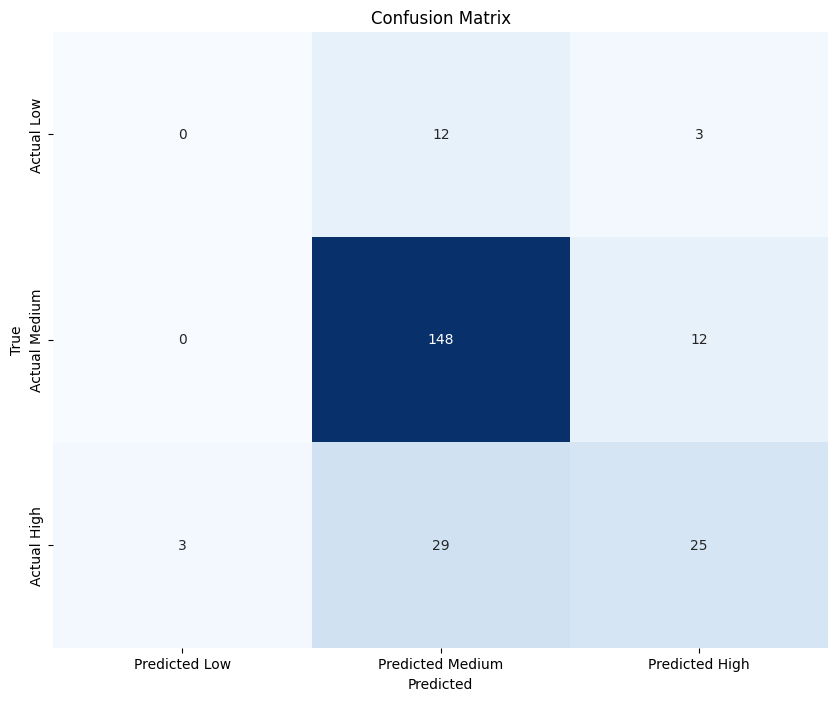

In [19]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_classifier_best)

# Plot confusion matrix as a heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Low', 'Predicted Medium', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual Medium', 'Actual High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Observations:**

1. **Accuracy and Precision:**
   - The model achieved an overall accuracy of 74.57%, with high precision for 'Low' trips (78%), but lower precision for 'Medium' (62%) and 'High' (0%) categories.

2. **Recall:**
   - While recall for 'Low' trips is high (93%), it is lower for 'Medium' (44%) and 'High' (0%) trips, indicating the model's struggle to capture instances in these categories.

3. **F1-Score:**
   - The weighted average F1-score is 0.71, suggesting a reasonable balance between precision and recall.